/usr/local/anaconda3/envs/tensorflow.1.12/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/envs/tensorflow.1.12/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/envs/tensorflow.1.12/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/envs

gpu time took: 0.5667
gpu time took: 0.0254
gpu time took: 0.0241
gpu time took: 0.0253
gpu time took: 0.0306
gpu time took: 0.0765
gpu time took: 0.2000
gpu time took: 0.4409
gpu time took: 0.7842
gpu time took: 2.9657
gpu time took: 5.7614
cpu time took: 0.0269
cpu time took: 0.0221
cpu time took: 0.0223
cpu time took: 0.0274
cpu time took: 0.0480
cpu time took: 0.1650
cpu time took: 0.4680
cpu time took: 1.0476
cpu time took: 1.9956
cpu time took: 7.9010
cpu time took: 15.2932


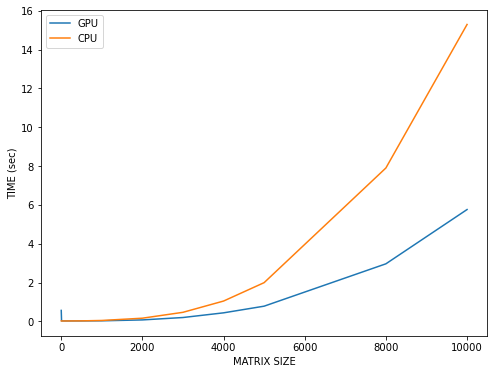

In [1]:
import tensorflow as tf
import time
sizes = [2, 10, 100, 500, 1000, 2000, 3000, 4000, 5000, 8000, 10000]
gpu_times = []
for size in sizes:
    tf.reset_default_graph()
    start = time.time()
    with tf.device('gpu:0'):
        v1 = tf.Variable(tf.random_normal((size, size)))
        v2 = tf.Variable(tf.random_normal((size, size)))
        op = tf.matmul(v1, v2)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(op)
    gpu_times.append(time.time() - start)
    print('gpu time took: {0:.4f}'.format(time.time() - start))


import tensorflow as tf
import time
cpu_times = []

for size in sizes:
    tf.reset_default_graph()
    start = time.time()
    with tf.device('cpu:0'):
        v1 = tf.Variable(tf.random_normal((size, size)))
        v2 = tf.Variable(tf.random_normal((size, size)))
        op = tf.matmul(v1, v2)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(op)
    cpu_times.append(time.time() - start)
    print('cpu time took: {0:.4f}'.format(time.time() - start))



import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sizes, gpu_times, label='GPU')
ax.plot(sizes, cpu_times, label='CPU')
plt.xlabel('MATRIX SIZE')
plt.ylabel('TIME (sec)')
plt.legend()
plt.show()